# Homework 1 Report

+ **Answer 1**

```python
def compute_metric():
    true = ["C", "C", "C", "C", "C", "D", "D", "D",	"D", "D", "D", "D", "D"	, "M", "M", "M", "M", "M", "M",	"M"]
    predicted = ["D", "C", "D", "D", "M", "D", "D", "C", "C", "M", "M", "D", "C", "C", "C", "M", "M", "D", "D",	"M"]

    # For the case of predicting cat
    conf_matrix={'C':{'TP':0, 'TN':0, 'FP':0, 'FN':0},'D':{'TP':0, 'TN':0, 'FP':0, 'FN':0},'M':{'TP':0, 'TN':0, 'FP':0, 'FN':0}}

    for t,p in zip(true, predicted):
        # For cat
        if t=='C' and p=='C': conf_matrix['C']['TP'] +=1
        if t!='C' and p!='C': conf_matrix['C']['TN'] +=1
        if t!='C' and p=='C': conf_matrix['C']['FP'] +=1
        if t=='C' and p!='C': conf_matrix['C']['FN'] +=1

        #For Dog
        if t=='D' and p=='D': conf_matrix['D']['TP'] +=1
        if t!='D' and p!='D': conf_matrix['D']['TN'] +=1
        if t!='D' and p=='D': conf_matrix['D']['FP'] +=1
        if t=='D' and p!='D': conf_matrix['D']['FN'] +=1

        #For Monkey
        if t=='M' and p=='M': conf_matrix['M']['TP'] +=1
        if t!='M' and p!='M': conf_matrix['M']['TN'] +=1
        if t!='M' and p=='M': conf_matrix['M']['FP'] +=1
        if t=='M' and p!='M': conf_matrix['M']['FN'] +=1

    for k, v in conf_matrix.items():
        print("Confusion matrix for {}".format(k), ":", "True Positive = {}, \
        True Negative = {}, False Positive = {}, False Negative = {}".format(v['TP'], v['TN'], v['FP'], v['FN']))
        print("Accuracy for {} = {}".format(k, (v['TP']+v['TN'])/(1.0*(v['TP']+v['TN']+v['FP']+v['FN']))))
        print("Precision for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FP']))))
        print("Recall for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FN']))))

if __name__=="__main__":
    compute_metric()
```

## **Results**
```python
Confusion matrix for C : True Positive = 1, True Negative = 10, False Positive = 5, False Negative = 4
Accuracy for C = 0.55
Precision for C = 0.16666666666666666
Recall for C = 0.2
Confusion matrix for D : True Positive = 3, True Negative = 7, False Positive = 5, False Negative = 5
Accuracy for D = 0.5
Precision for D = 0.375
Recall for D = 0.375
Confusion matrix for M : True Positive = 3, True Negative = 10, False Positive = 3, False Negative = 4
Accuracy for M = 0.65
Precision for M = 0.5
Recall for M = 0.42857142857142855
```

## Problem -2: K-Nearest Neighbor Method (KNN) 

In [1]:
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score#,confusion_matrix
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
print('starting...')

#old_stdout = sys.stdout
#log_file = open("summary.log","w")
#sys.stdout = log_file


print('\nLoading MNIST Data...')
# data = MNIST('./python-mnist/data/')

data = MNIST('./MNIST_Dataset_Loader/dataset/')

starting...

Loading MNIST Data...


In [3]:
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)


Loading Training Data...


In [4]:
print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


Loading Testing Data...


In [5]:
#Features
X = train_img

#Labels
y = train_labels

In [6]:
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


Preparing Classifier Training and Validation Data...


In [15]:
#######################PLACEHOLDER 1##################### 
#set hyperparameter
#n_neighbors=[5,10,13,15,20]
n_neighbors=[5, 10, 15, 20]

In [21]:
print("\n KNN Classifier")
print("\n Pickling the classifier for future Use.. " )

#######################PLACEHOLDER 2 START #####################
#write a function that can produce aconfusion matrix, per-class precidion rate and per-class recall rate.

# use the function to create a confusion matrix for validation data
def clf_per_n_nbr(nbrs, X_train, y_train, X_test, y_test):
    confidence_list=[]
    y_pred_list=[]
    accuracy_list=[]
    for n in nbrs:
        clf = KNeighborsClassifier(n_neighbors=n, algorithm='auto', n_jobs=10)
        clf.fit(X_train, y_train)
        
        filename='MNIST_KNN'+'_'+str(n)+'.pickle'
        
        with open(filename,'wb') as f:
            pickle.dump(clf, f)

        pickle_in = open(filename,'rb')
        clf = pickle.load(pickle_in)

        print('\n Calculating Accuracy of trained Classifier for nbrs = {}...'.format(n))
        confidence=round(clf.score(X_test,y_test),2)
        confidence_list.append(confidence)

        print('\n Making Predictions on Validation Data...for nbrs = {}'.format(n))
        y_pred=clf.predict(X_test)
        y_pred_list.append(y_pred)

        print('\n Calculating Accuracy of Predictions...for nbrs = {}'.format(n))
        accuracy=round(accuracy_score(y_test, y_pred),2)
        accuracy_list.append(accuracy)
        
    return confidence_list, y_pred_list, accuracy_list


 KNN Classifier

 Pickling the classifier for future Use.. 


In [22]:
confidence, y_pred, accuracy = clf_per_n_nbr(n_neighbors, X_train, y_train, X_test, y_test)


 Calculating Accuracy of trained Classifier for nbrs = 5...

 Making Predictions on Validation Data...for nbrs = 5

 Calculating Accuracy of Predictions...for nbrs = 5

 Calculating Accuracy of trained Classifier for nbrs = 10...

 Making Predictions on Validation Data...for nbrs = 10

 Calculating Accuracy of Predictions...for nbrs = 10

 Calculating Accuracy of trained Classifier for nbrs = 15...

 Making Predictions on Validation Data...for nbrs = 15

 Calculating Accuracy of Predictions...for nbrs = 15

 Calculating Accuracy of trained Classifier for nbrs = 20...

 Making Predictions on Validation Data...for nbrs = 20

 Calculating Accuracy of Predictions...for nbrs = 20


In [32]:
# Confusion Matrix per Class (10)
def compute_metrics(test, pred):
    # Create the dictionary for each class
    conf_matrix={val:{'TP':0, 'TN':0, 'FP':0, 'FN':0} for val in range(10)}
    
    for t,p in zip(test, pred):
        for val in range(10):
            # For each class we can calculate this
            if t==val and p==val: conf_matrix[val]['TP'] +=1
            if t!=val and p!=val: conf_matrix[val]['TN'] +=1
            if t!=val and p==val: conf_matrix[val]['FP'] +=1
            if t==val and p!=val: conf_matrix[val]['FN'] +=1
    
    #to Plot
    for k, v in conf_matrix.items():
        print("Confusion matrix for {}".format(k), ":", "True Positive = {}, True Negative = {}, False Positive = {}, False Negative = {}".format(v['TP'], v['TN'], v['FP'], v['FN']))
        conf_mat=np.array([[v['TP'], v['FP']],
                           [v['FN'], v['TN']]])
        plt.matshow(conf_mat)
        plt.title('Confusion Matrix for Validation Data')
        plt.colorbar()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
        print("Accuracy for {} = {}".format(k, (v['TP']+v['TN'])/(1.0*(v['TP']+v['TN']+v['FP']+v['FN']))))
        print("Precision for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FP']))))
        print("Recall for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FN']))))



#######################################################################################
#######################################################################################
#######################################################################################


For number of neighbors = 5

 KNN Trained Classifier Confidence:  0.97

 Predicted Values:  [4 7 8 ... 2 4 7]

 Accuracy of Classifier on Validation Image Data:  0.97
Confusion matrix for 0 : True Positive = 611, True Negative = 5373, False Positive = 12, False Negative = 4


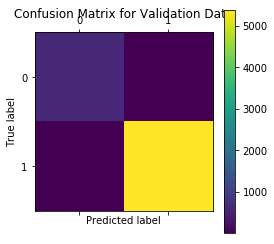

Accuracy for 0 = 0.9973333333333333
Precision for 0 = 0.9807383627608347
Recall for 0 = 0.9934959349593496
Confusion matrix for 1 : True Positive = 676, True Negative = 5297, False Positive = 25, False Negative = 2


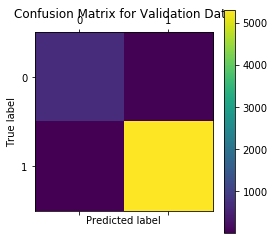

Accuracy for 1 = 0.9955
Precision for 1 = 0.9643366619115549
Recall for 1 = 0.9970501474926253
Confusion matrix for 2 : True Positive = 589, True Negative = 5375, False Positive = 11, False Negative = 25


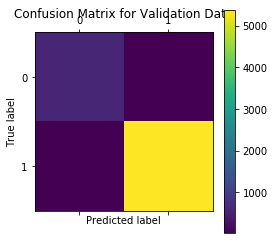

Accuracy for 2 = 0.994
Precision for 2 = 0.9816666666666667
Recall for 2 = 0.9592833876221498
Confusion matrix for 3 : True Positive = 566, True Negative = 5390, False Positive = 25, False Negative = 19


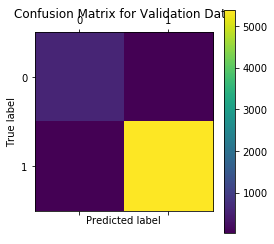

Accuracy for 3 = 0.9926666666666667
Precision for 3 = 0.9576988155668359
Recall for 3 = 0.9675213675213675
Confusion matrix for 4 : True Positive = 551, True Negative = 5419, False Positive = 13, False Negative = 17


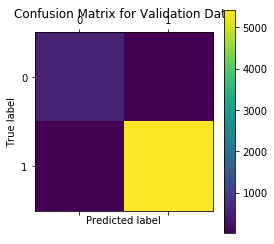

Accuracy for 4 = 0.995
Precision for 4 = 0.9769503546099291
Recall for 4 = 0.9700704225352113
Confusion matrix for 5 : True Positive = 556, True Negative = 5408, False Positive = 12, False Negative = 24


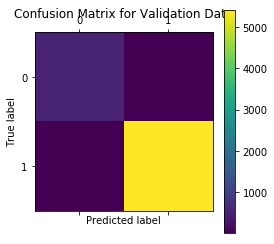

Accuracy for 5 = 0.994
Precision for 5 = 0.9788732394366197
Recall for 5 = 0.9586206896551724
Confusion matrix for 6 : True Positive = 565, True Negative = 5418, False Positive = 10, False Negative = 7


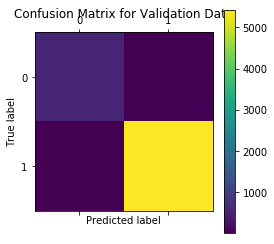

Accuracy for 6 = 0.9971666666666666
Precision for 6 = 0.9826086956521739
Recall for 6 = 0.9877622377622378
Confusion matrix for 7 : True Positive = 621, True Negative = 5341, False Positive = 25, False Negative = 13


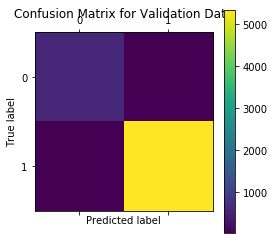

Accuracy for 7 = 0.9936666666666667
Precision for 7 = 0.9613003095975232
Recall for 7 = 0.9794952681388013
Confusion matrix for 8 : True Positive = 574, True Negative = 5393, False Positive = 3, False Negative = 30


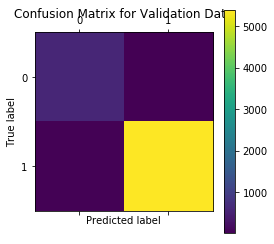

Accuracy for 8 = 0.9945
Precision for 8 = 0.9948006932409013
Recall for 8 = 0.9503311258278145
Confusion matrix for 9 : True Positive = 528, True Negative = 5423, False Positive = 27, False Negative = 22


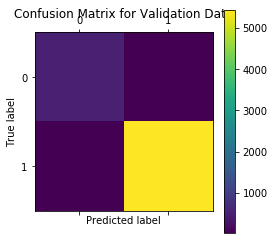

Accuracy for 9 = 0.9918333333333333
Precision for 9 = 0.9513513513513514
Recall for 9 = 0.96


#######################################################################################
#######################################################################################
#######################################################################################


For number of neighbors = 10

 KNN Trained Classifier Confidence:  0.97

 Predicted Values:  [4 7 8 ... 2 4 7]

 Accuracy of Classifier on Validation Image Data:  0.97
Confusion matrix for 0 : True Positive = 613, True Negative = 5369, False Positive = 16, False Negative = 2


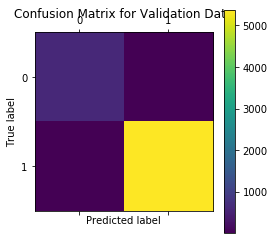

Accuracy for 0 = 0.997
Precision for 0 = 0.9745627980922098
Recall for 0 = 0.9967479674796748
Confusion matrix for 1 : True Positive = 674, True Negative = 5286, False Positive = 36, False Negative = 4


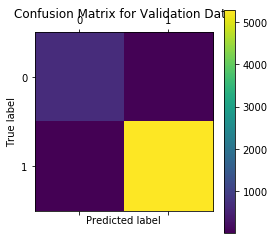

Accuracy for 1 = 0.9933333333333333
Precision for 1 = 0.9492957746478873
Recall for 1 = 0.9941002949852508
Confusion matrix for 2 : True Positive = 586, True Negative = 5371, False Positive = 15, False Negative = 28


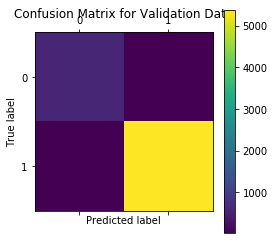

Accuracy for 2 = 0.9928333333333333
Precision for 2 = 0.9750415973377704
Recall for 2 = 0.9543973941368078
Confusion matrix for 3 : True Positive = 559, True Negative = 5391, False Positive = 24, False Negative = 26


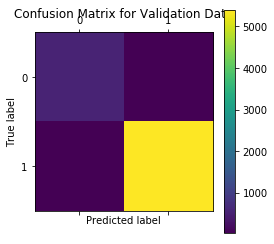

Accuracy for 3 = 0.9916666666666667
Precision for 3 = 0.9588336192109777
Recall for 3 = 0.9555555555555556
Confusion matrix for 4 : True Positive = 547, True Negative = 5415, False Positive = 17, False Negative = 21


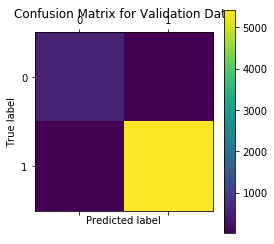

Accuracy for 4 = 0.9936666666666667
Precision for 4 = 0.9698581560283688
Recall for 4 = 0.9630281690140845
Confusion matrix for 5 : True Positive = 554, True Negative = 5405, False Positive = 15, False Negative = 26


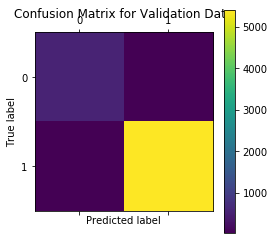

Accuracy for 5 = 0.9931666666666666
Precision for 5 = 0.9736379613356766
Recall for 5 = 0.9551724137931035
Confusion matrix for 6 : True Positive = 563, True Negative = 5416, False Positive = 12, False Negative = 9


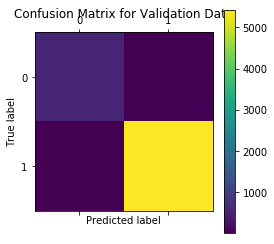

Accuracy for 6 = 0.9965
Precision for 6 = 0.9791304347826087
Recall for 6 = 0.9842657342657343
Confusion matrix for 7 : True Positive = 612, True Negative = 5337, False Positive = 29, False Negative = 22


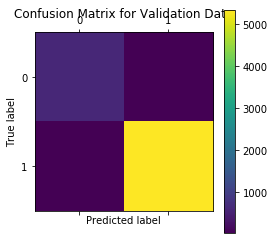

Accuracy for 7 = 0.9915
Precision for 7 = 0.9547581903276131
Recall for 7 = 0.9652996845425867
Confusion matrix for 8 : True Positive = 567, True Negative = 5392, False Positive = 4, False Negative = 37


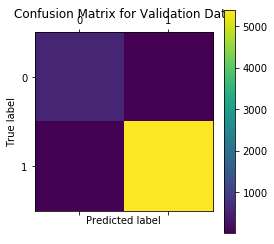

Accuracy for 8 = 0.9931666666666666
Precision for 8 = 0.9929947460595446
Recall for 8 = 0.9387417218543046
Confusion matrix for 9 : True Positive = 526, True Negative = 5419, False Positive = 31, False Negative = 24


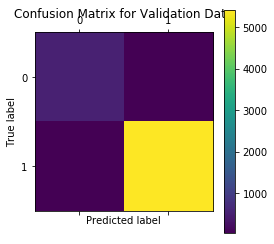

Accuracy for 9 = 0.9908333333333333
Precision for 9 = 0.9443447037701975
Recall for 9 = 0.9563636363636364


#######################################################################################
#######################################################################################
#######################################################################################


For number of neighbors = 15

 KNN Trained Classifier Confidence:  0.96

 Predicted Values:  [4 7 8 ... 2 4 7]

 Accuracy of Classifier on Validation Image Data:  0.96
Confusion matrix for 0 : True Positive = 612, True Negative = 5369, False Positive = 16, False Negative = 3


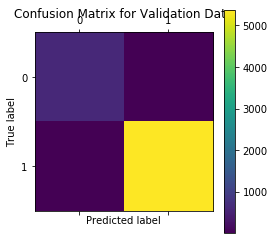

Accuracy for 0 = 0.9968333333333333
Precision for 0 = 0.9745222929936306
Recall for 0 = 0.9951219512195122
Confusion matrix for 1 : True Positive = 672, True Negative = 5285, False Positive = 37, False Negative = 6


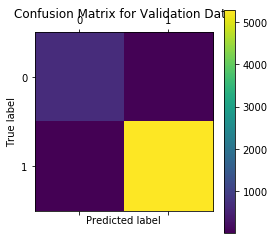

Accuracy for 1 = 0.9928333333333333
Precision for 1 = 0.9478138222849083
Recall for 1 = 0.9911504424778761
Confusion matrix for 2 : True Positive = 581, True Negative = 5372, False Positive = 14, False Negative = 33


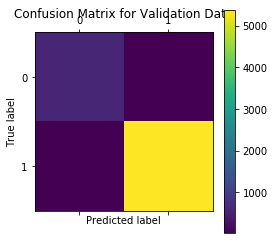

Accuracy for 2 = 0.9921666666666666
Precision for 2 = 0.9764705882352941
Recall for 2 = 0.9462540716612378
Confusion matrix for 3 : True Positive = 559, True Negative = 5384, False Positive = 31, False Negative = 26


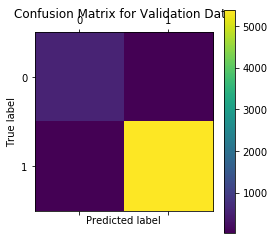

Accuracy for 3 = 0.9905
Precision for 3 = 0.9474576271186441
Recall for 3 = 0.9555555555555556
Confusion matrix for 4 : True Positive = 543, True Negative = 5414, False Positive = 18, False Negative = 25


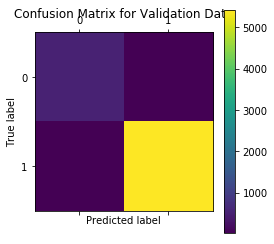

Accuracy for 4 = 0.9928333333333333
Precision for 4 = 0.9679144385026738
Recall for 4 = 0.9559859154929577
Confusion matrix for 5 : True Positive = 550, True Negative = 5406, False Positive = 14, False Negative = 30


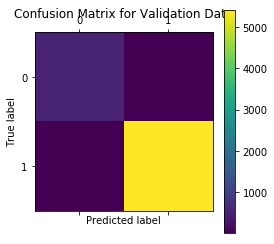

Accuracy for 5 = 0.9926666666666667
Precision for 5 = 0.975177304964539
Recall for 5 = 0.9482758620689655
Confusion matrix for 6 : True Positive = 564, True Negative = 5412, False Positive = 16, False Negative = 8


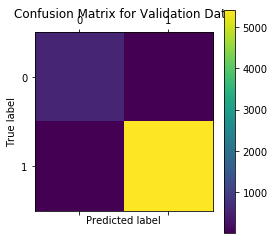

Accuracy for 6 = 0.996
Precision for 6 = 0.9724137931034482
Recall for 6 = 0.986013986013986
Confusion matrix for 7 : True Positive = 614, True Negative = 5336, False Positive = 30, False Negative = 20


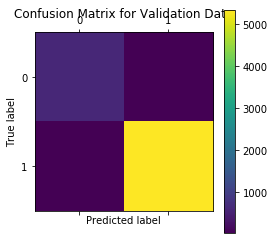

Accuracy for 7 = 0.9916666666666667
Precision for 7 = 0.953416149068323
Recall for 7 = 0.9684542586750788
Confusion matrix for 8 : True Positive = 560, True Negative = 5392, False Positive = 4, False Negative = 44


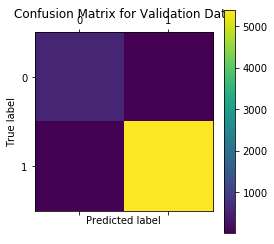

Accuracy for 8 = 0.992
Precision for 8 = 0.9929078014184397
Recall for 8 = 0.9271523178807947
Confusion matrix for 9 : True Positive = 527, True Negative = 5412, False Positive = 38, False Negative = 23


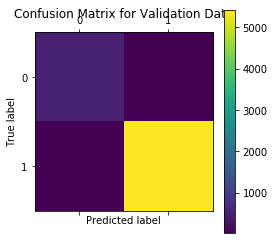

Accuracy for 9 = 0.9898333333333333
Precision for 9 = 0.9327433628318584
Recall for 9 = 0.9581818181818181


#######################################################################################
#######################################################################################
#######################################################################################


For number of neighbors = 20

 KNN Trained Classifier Confidence:  0.96

 Predicted Values:  [4 7 8 ... 2 4 7]

 Accuracy of Classifier on Validation Image Data:  0.96
Confusion matrix for 0 : True Positive = 613, True Negative = 5368, False Positive = 17, False Negative = 2


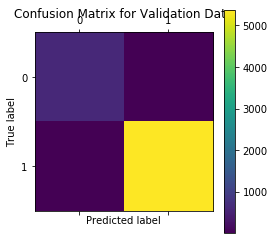

Accuracy for 0 = 0.9968333333333333
Precision for 0 = 0.973015873015873
Recall for 0 = 0.9967479674796748
Confusion matrix for 1 : True Positive = 672, True Negative = 5273, False Positive = 49, False Negative = 6


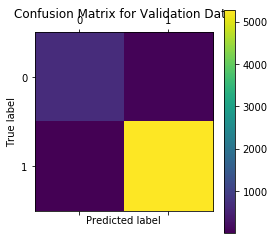

Accuracy for 1 = 0.9908333333333333
Precision for 1 = 0.9320388349514563
Recall for 1 = 0.9911504424778761
Confusion matrix for 2 : True Positive = 573, True Negative = 5372, False Positive = 14, False Negative = 41


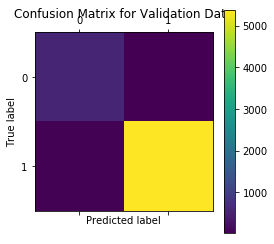

Accuracy for 2 = 0.9908333333333333
Precision for 2 = 0.9761499148211243
Recall for 2 = 0.9332247557003257
Confusion matrix for 3 : True Positive = 555, True Negative = 5386, False Positive = 29, False Negative = 30


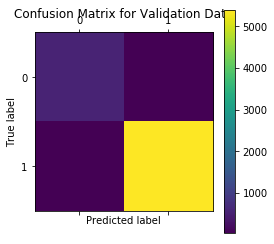

Accuracy for 3 = 0.9901666666666666
Precision for 3 = 0.9503424657534246
Recall for 3 = 0.9487179487179487
Confusion matrix for 4 : True Positive = 542, True Negative = 5414, False Positive = 18, False Negative = 26


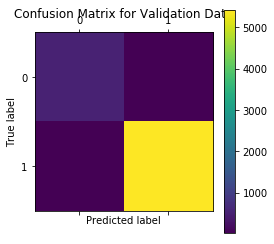

Accuracy for 4 = 0.9926666666666667
Precision for 4 = 0.9678571428571429
Recall for 4 = 0.954225352112676
Confusion matrix for 5 : True Positive = 549, True Negative = 5405, False Positive = 15, False Negative = 31


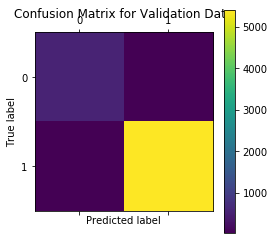

Accuracy for 5 = 0.9923333333333333
Precision for 5 = 0.973404255319149
Recall for 5 = 0.946551724137931
Confusion matrix for 6 : True Positive = 565, True Negative = 5413, False Positive = 15, False Negative = 7


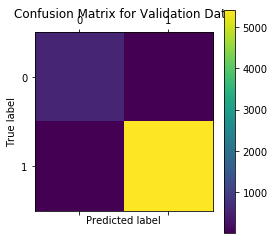

Accuracy for 6 = 0.9963333333333333
Precision for 6 = 0.9741379310344828
Recall for 6 = 0.9877622377622378
Confusion matrix for 7 : True Positive = 611, True Negative = 5334, False Positive = 32, False Negative = 23


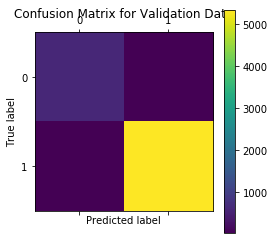

Accuracy for 7 = 0.9908333333333333
Precision for 7 = 0.9502332814930016
Recall for 7 = 0.9637223974763407
Confusion matrix for 8 : True Positive = 561, True Negative = 5392, False Positive = 4, False Negative = 43


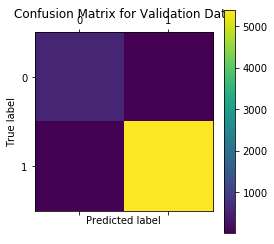

Accuracy for 8 = 0.9921666666666666
Precision for 8 = 0.9929203539823008
Recall for 8 = 0.9288079470198676
Confusion matrix for 9 : True Positive = 524, True Negative = 5408, False Positive = 42, False Negative = 26


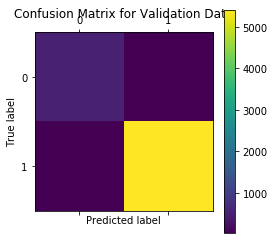

Accuracy for 9 = 0.9886666666666667
Precision for 9 = 0.9257950530035336
Recall for 9 = 0.9527272727272728


In [33]:
#Get the Metrics per class here
for n in range(4):
    print("\n")
    print("#######################################################################################")
    print("#######################################################################################")
    print("#######################################################################################")
    print("\n")
    print("For number of neighbors = {}".format(n_neighbors[n]))
    print('\n KNN Trained Classifier Confidence: ',confidence[n])
    print('\n Predicted Values: ',y_pred[n])
    print('\n Accuracy of Classifier on Validation Image Data: ',accuracy[n])
    compute_metrics(y_test, y_pred[n])
#######################PLACEHOLDER 2 ENDS ##################### 

In [37]:
# Now we need to choose which pickle file is best to use, Plot all of them
print(accuracy)

[0.97, 0.97, 0.96, 0.96]


### It seems that n=5 is giving an accuracy of 0.97 which is good enough

In [38]:
filename='MNIST_KNN_5.pickle'
pickle_in = open(filename,'rb')
clf = pickle.load(pickle_in)

In [39]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred=clf.predict(test_img)


Making Predictions on Test Input Images...


In [40]:
print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc=accuracy_score(test_labels, test_labels_pred)


Calculating Accuracy of Trained Classifier on Test Data... 


In [42]:
# Confusion Matrix per Class (10)
def compute_metrics_test(test, pred):
    # Create the dictionary for each class
    conf_matrix={val:{'TP':0, 'TN':0, 'FP':0, 'FN':0} for val in range(10)}
    
    for t,p in zip(test, pred):
        for val in range(10):
            # For each class we can calculate this
            if t==val and p==val: conf_matrix[val]['TP'] +=1
            if t!=val and p!=val: conf_matrix[val]['TN'] +=1
            if t!=val and p==val: conf_matrix[val]['FP'] +=1
            if t==val and p!=val: conf_matrix[val]['FN'] +=1
    
    #to Plot
    for k, v in conf_matrix.items():
        print("Confusion matrix for {}".format(k), ":", "True Positive = {}, True Negative = {}, False Positive = {}, False Negative = {}".format(v['TP'], v['TN'], v['FP'], v['FN']))
        conf_mat=np.array([[v['TP'], v['FP']],
                           [v['FN'], v['TN']]])
        plt.matshow(conf_mat)
        plt.title('Confusion Matrix for Test Data')
        plt.colorbar()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.axis('off')
        plt.show()
        print("Accuracy for {} = {}".format(k, (v['TP']+v['TN'])/(1.0*(v['TP']+v['TN']+v['FP']+v['FN']))))
        print("Precision for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FP']))))
        print("Recall for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FN']))))

#######################################################################################
#######################################################################################
#######################################################################################

Creating Confusion Matrix for Test Data...

For number of neighbors = 5

Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9679
Confusion matrix for 0 : True Positive = 974, True Negative = 8982, False Positive = 38, False Negative = 6


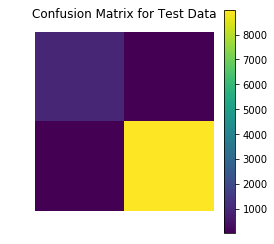

Accuracy for 0 = 0.9956
Precision for 0 = 0.9624505928853755
Recall for 0 = 0.9938775510204082
Confusion matrix for 1 : True Positive = 1132, True Negative = 8812, False Positive = 53, False Negative = 3


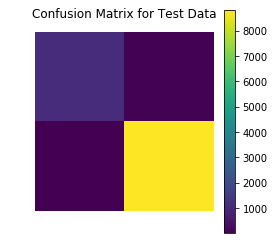

Accuracy for 1 = 0.9944
Precision for 1 = 0.9552742616033755
Recall for 1 = 0.9973568281938326
Confusion matrix for 2 : True Positive = 988, True Negative = 8950, False Positive = 18, False Negative = 44


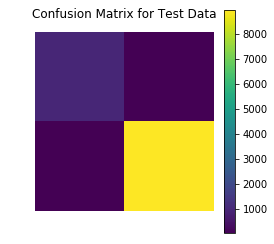

Accuracy for 2 = 0.9938
Precision for 2 = 0.9821073558648111
Recall for 2 = 0.9573643410852714
Confusion matrix for 3 : True Positive = 976, True Negative = 8952, False Positive = 38, False Negative = 34


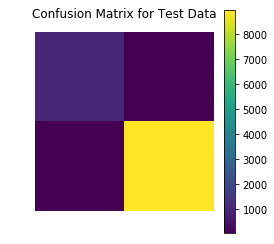

Accuracy for 3 = 0.9928
Precision for 3 = 0.9625246548323472
Recall for 3 = 0.9663366336633663
Confusion matrix for 4 : True Positive = 944, True Negative = 8992, False Positive = 26, False Negative = 38


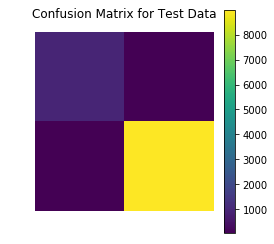

Accuracy for 4 = 0.9936
Precision for 4 = 0.9731958762886598
Recall for 4 = 0.9613034623217923
Confusion matrix for 5 : True Positive = 862, True Negative = 9079, False Positive = 29, False Negative = 30


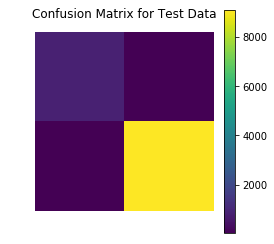

Accuracy for 5 = 0.9941
Precision for 5 = 0.9674523007856342
Recall for 5 = 0.9663677130044843
Confusion matrix for 6 : True Positive = 944, True Negative = 9023, False Positive = 19, False Negative = 14


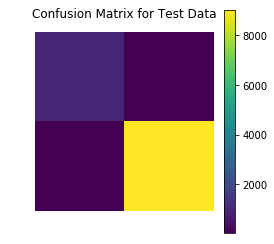

Accuracy for 6 = 0.9967
Precision for 6 = 0.980269989615784
Recall for 6 = 0.9853862212943633
Confusion matrix for 7 : True Positive = 988, True Negative = 8930, False Positive = 42, False Negative = 40


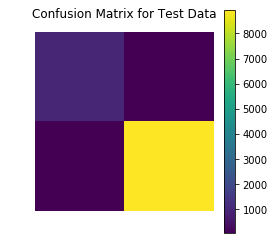

Accuracy for 7 = 0.9918
Precision for 7 = 0.9592233009708738
Recall for 7 = 0.9610894941634242
Confusion matrix for 8 : True Positive = 910, True Negative = 9013, False Positive = 13, False Negative = 64


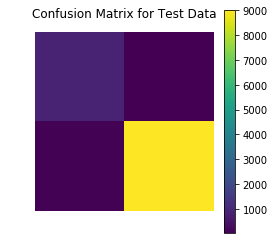

Accuracy for 8 = 0.9923
Precision for 8 = 0.9859154929577465
Recall for 8 = 0.9342915811088296
Confusion matrix for 9 : True Positive = 961, True Negative = 8946, False Positive = 45, False Negative = 48


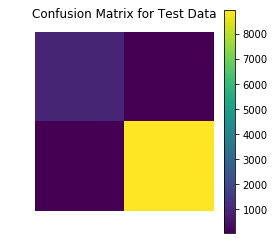

Accuracy for 9 = 0.9907
Precision for 9 = 0.9552683896620279
Recall for 9 = 0.9524281466798811


In [44]:
#######################PLACEHOLDER 3 START #####################
# call the same function as in PLACEHOLDER 2 to generate aconfusion matrix for testing data
#Get the Metrics per class here
print("#######################################################################################")
print("#######################################################################################")
print("#######################################################################################")
print('\nCreating Confusion Matrix for Test Data...')
print("\nFor number of neighbors = {}".format(5))
print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
compute_metrics_test(test_labels, test_labels_pred)
#######################PLACEHOLDER 3 END #####################

Actual value = 4, Predicted value = 0


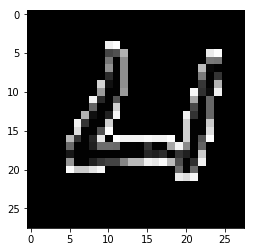



Actual value = 9, Predicted value = 4


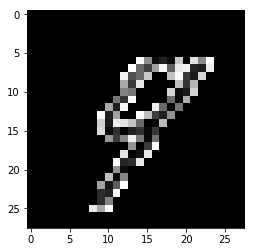



Actual value = 4, Predicted value = 9


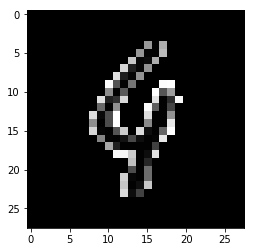



Actual value = 3, Predicted value = 1


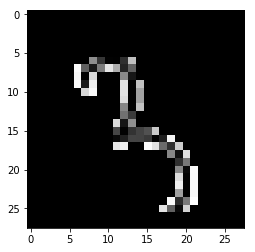



Actual value = 9, Predicted value = 8


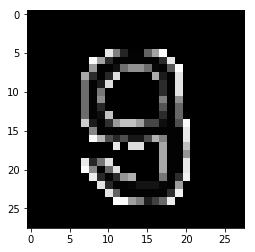

In [59]:
#######################PLACEHOLDER 4 START #####################
# randomly select and show 5 images that are misclassified
count=0
for idx,(t,p) in enumerate(zip(test_labels, test_labels_pred)):
        #if count>5:break
        for val in range(10):
            # For each class we can calculate this
            if t!=val and p==val:
                print("Actual value = {}, Predicted value = {}".format(t, p))
                toprint = (np.reshape(test_img[idx], (28, 28)) * 255).astype(np.uint8)
                plt.imshow(toprint, interpolation='nearest', cmap='gray')
                plt.show()
                count+=1
                print("\n")
                break
            if t==val and p!=val:
                print("Actual value = {}, Predicted value = {}".format(t, p))
                toprint = (np.reshape(test_img[idx], (28, 28)) * 255).astype(np.uint8)
                plt.imshow(toprint, interpolation='nearest', cmap='gray')
                plt.show()
                count+=1
                print("\n")
                break
        if count>=5:break
                
#######################PLACEHOLDER 4 END #####################

## Challenges
+ Above I have shown five cases where there are misclassifications. 
+ It seems mostly there are shape variations and deformations that are causing the model to not predict correctly
+ There are some noise figures which are missclasified

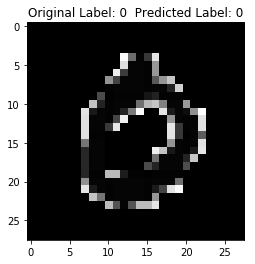

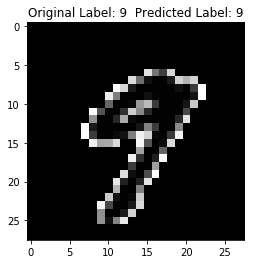

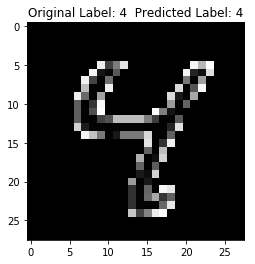

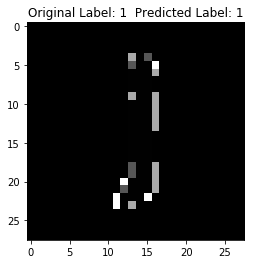

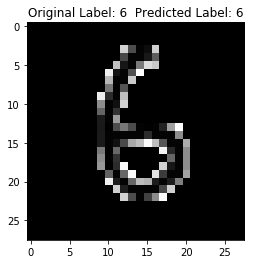

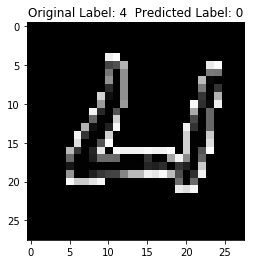

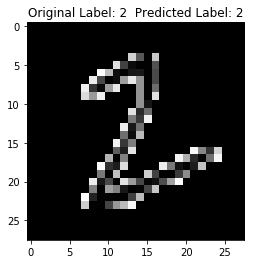

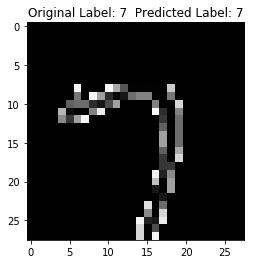

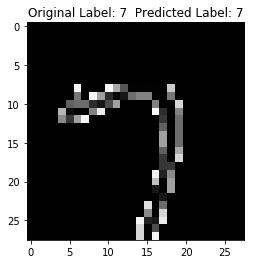

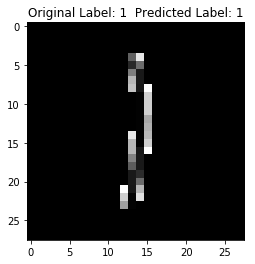

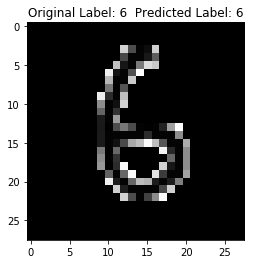

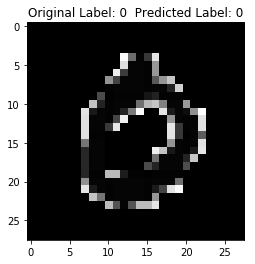

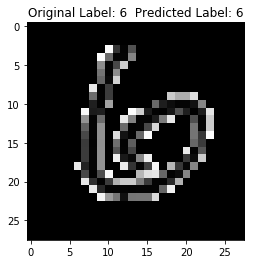

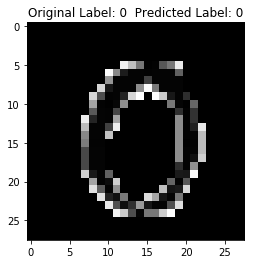

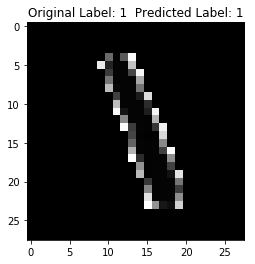

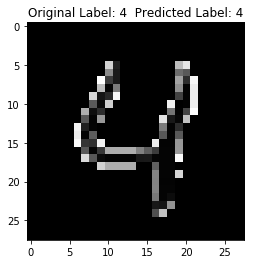

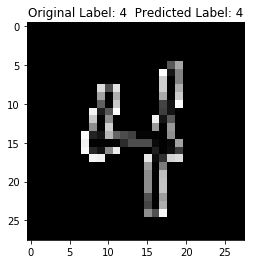

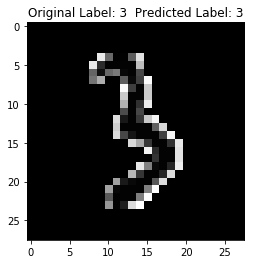

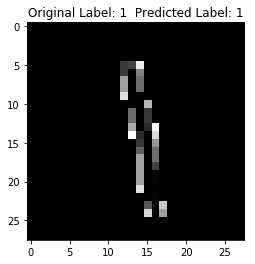

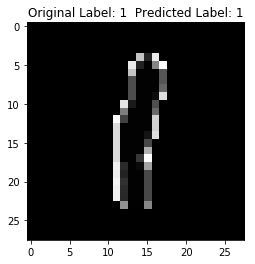

In [60]:
# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,50,20)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

#------------------------- EOC -----------------------------